# Census income classification

Following are the steps we're going to cover:
1. Import libraries
2. Load dataset
3. Summarize dataset
4. Visualize dataset
5. Evaluate algorithms
6. Make predictions

## 1. Import libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns

## 2. Load dataset

In [2]:
names = ['age','workclass','final-wt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hrs-per-week','native-country','income']
train = pd.read_csv('census_income_train.csv', header=None, names=names)
test = pd.read_csv('census_income_test.csv', header=None, names=names)

## 3. Summarize dataset

### 3.1 Dimensions of data

In [3]:
train.shape

(32561, 15)

In [4]:
test.shape

(16281, 15)

### 3.2 Peek of data

In [5]:
train.head()

,age,workclass,final-wt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test.head()

,age,workclass,final-wt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### 3.3 Statistical summary

In [7]:
train.describe()

,age,final-wt,education-num,capital-gain,capital-loss,hrs-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
test.describe()

,age,final-wt,education-num,capital-gain,capital-loss,hrs-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [9]:
train.dtypes

age                int64
workclass         object
final-wt           int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hrs-per-week       int64
native-country    object
income            object
dtype: object

### 3.4 Missing values

In [10]:
train.isnull().sum()

age               0
workclass         0
final-wt          0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hrs-per-week      0
native-country    0
income            0
dtype: int64

In [11]:
test.isnull().sum()

age               0
workclass         0
final-wt          0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hrs-per-week      0
native-country    0
income            0
dtype: int64

In [12]:
def strip_text_column(col):
    train[col] = train[col].map(lambda x: x.strip())
    test[col] = test[col].map(lambda x: x.strip())
    
cols = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']
[strip_text_column(column) for column in cols]

[None, None, None, None, None, None, None, None, None]

In [13]:
def find_unknown_percent(col, dataset):
    total_unknown_values = len((dataset[dataset[col]=='?']))
    total_values = len(dataset[col])
    print("% of Unknown(?) values in '{0}' feature({1}/{2}) - {3:.2f}%".format(col, total_unknown_values, total_values, (total_unknown_values/total_values)*100))

print('Train ====')
[find_unknown_percent(column, train) for column in cols]

print('Test ====')
[find_unknown_percent(column, test) for column in cols]

Train ====
% of Unknown(?) values in 'workclass' feature(1836/32561) - 5.64%
% of Unknown(?) values in 'education' feature(0/32561) - 0.00%
% of Unknown(?) values in 'marital-status' feature(0/32561) - 0.00%
% of Unknown(?) values in 'occupation' feature(1843/32561) - 5.66%
% of Unknown(?) values in 'relationship' feature(0/32561) - 0.00%
% of Unknown(?) values in 'race' feature(0/32561) - 0.00%
% of Unknown(?) values in 'sex' feature(0/32561) - 0.00%
% of Unknown(?) values in 'native-country' feature(583/32561) - 1.79%
% of Unknown(?) values in 'income' feature(0/32561) - 0.00%
Test ====
% of Unknown(?) values in 'workclass' feature(963/16281) - 5.91%
% of Unknown(?) values in 'education' feature(0/16281) - 0.00%
% of Unknown(?) values in 'marital-status' feature(0/16281) - 0.00%
% of Unknown(?) values in 'occupation' feature(966/16281) - 5.93%
% of Unknown(?) values in 'relationship' feature(0/16281) - 0.00%
% of Unknown(?) values in 'race' feature(0/16281) - 0.00%
% of Unknown(?) va

[None, None, None, None, None, None, None, None, None]

In [14]:
print('Train dataset Shape before removing null values {}'.format(train.shape))

train = train[train['workclass'] != '?']
train = train[train['occupation'] != '?']
train = train[train['native-country'] != '?']

print('Train dataset Shape after removing null values {}'.format(train.shape))

print('Test dataset Shape before removing null values {}'.format(test.shape))

test = test[test['workclass'] != '?']
test = test[test['occupation'] != '?']
test = test[test['native-country'] != '?']

print('Test dataset Shape after removing null values {}'.format(test.shape))


Train dataset Shape before removing null values (32561, 15)
Train dataset Shape after removing null values (30162, 15)
Test dataset Shape before removing null values (16281, 15)
Test dataset Shape after removing null values (15060, 15)


## 4. Visualize dataset
### 4.1 Univariate analysis
#### 4.1.1 Categorical variables

1. Workclass
2. Education
3. Marital-status
4. Occupation
5. Relationship
6. Race
7. Sex
8. Native-country

**1. Workclass**

In [15]:
print(train['workclass'].value_counts())
print("=============")
print(train['workclass'].value_counts(normalize=True))

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64
Private             0.738877
Self-emp-not-inc    0.082853
Local-gov           0.068530
State-gov           0.042404
Self-emp-inc        0.035608
Federal-gov         0.031265
Without-pay         0.000464
Name: workclass, dtype: float64


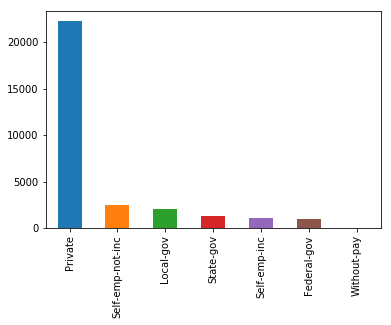

In [16]:
train['workclass'].value_counts().plot.bar()

Using above analysis, we can see 69.7% are "Private" working class. So this is not a good candidate for analysis. In future, for better analysis, we might split data with workclass="private" and workclass!="private" and do analysis on 2 train datasets.

**2. Education**

In [17]:
train['education'].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

In [18]:
train['education'].value_counts(normalize=True)

HS-grad         0.326238
Some-college    0.221404
Bachelors       0.167230
Masters         0.053942
Assoc-voc       0.043333
11th            0.034746
Assoc-acdm      0.033420
10th            0.027187
7th-8th         0.018467
Prof-school     0.017970
9th             0.015085
12th            0.012499
Doctorate       0.012433
5th-6th         0.009548
1st-4th         0.005006
Preschool       0.001492
Name: education, dtype: float64

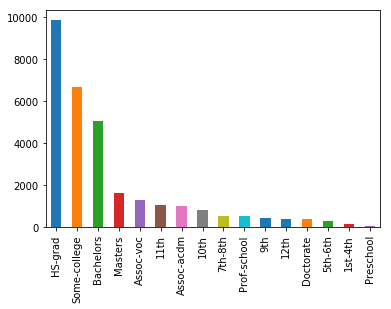

In [19]:
train['education'].value_counts().plot.bar()

'Education' can be a good candidate. Looking at above dataset, we can see that combination of 'HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc' comprises of 80% of dataset. So we could group multiple categories into broad categories and then try to visualize the dataset on the same. We can try to group 11th, Assoc-acdm, ... into 'Others' category. Let's add new column 'education-new' and have 'Others' for above categories.

In [20]:
edu_categories = ['HS-grad','Some-college','Bachelors','Masters','Assoc-voc']
def get_education_cat(edu_cat):
    edu_cat = edu_cat.strip()
    if edu_cat not in edu_categories:
        return 'Others'
    return (edu_cat)

train['education-new'] = train['education'].map(lambda x: get_education_cat(x))
test['education-new'] = test['education'].map(lambda x: get_education_cat(x))

In [21]:
train['education-new'].value_counts(normalize=True)

HS-grad         0.326238
Some-college    0.221404
Others          0.187852
Bachelors       0.167230
Masters         0.053942
Assoc-voc       0.043333
Name: education-new, dtype: float64

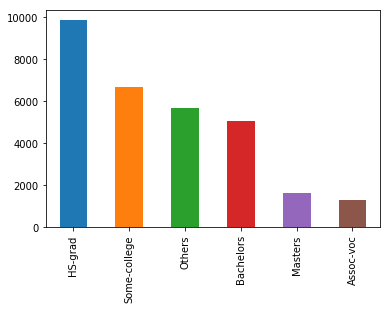

In [22]:
train['education-new'].value_counts().plot.bar()

**3. Marital-status**

In [23]:
train['marital-status'].value_counts(normalize=True)

Married-civ-spouse       0.466315
Never-married            0.322459
Divorced                 0.139712
Separated                0.031132
Widowed                  0.027419
Married-spouse-absent    0.012267
Married-AF-spouse        0.000696
Name: marital-status, dtype: float64

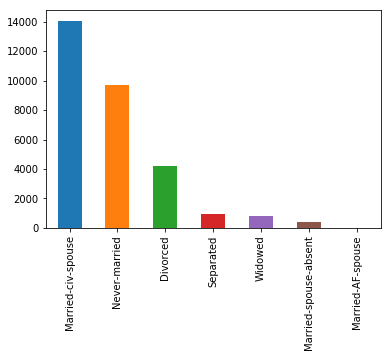

In [24]:
train['marital-status'].value_counts().plot.bar()

'Marital-status' have 3 categories comprising of ~90%, so we can introduce 'Others' similar to 'Education'. 

In [25]:
marital_status_categories = ['Married-civ-spouse','Never-married','Divorced']
def get_marital_status_cat(mar_stat_cat):
    mar_stat_cat = mar_stat_cat.strip()
    if mar_stat_cat not in marital_status_categories:
        return 'Others'
    return mar_stat_cat

train['marital-status-new'] = train['marital-status'].map(lambda x: get_marital_status_cat(x))
test['marital-status-new'] = test['marital-status'].map(lambda x: get_marital_status_cat(x))

In [26]:
train['marital-status-new'].value_counts(normalize=True)

Married-civ-spouse    0.466315
Never-married         0.322459
Divorced              0.139712
Others                0.071514
Name: marital-status-new, dtype: float64

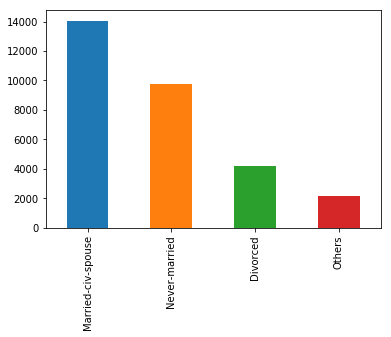

In [27]:
train['marital-status-new'].value_counts().plot.bar()

**4. Occupation**

In [28]:
train['occupation'].value_counts(normalize=True)

Prof-specialty       0.133877
Craft-repair         0.133612
Exec-managerial      0.132352
Adm-clerical         0.123367
Sales                0.118825
Other-service        0.106492
Machine-op-inspct    0.065181
Transport-moving     0.052119
Handlers-cleaners    0.044758
Farming-fishing      0.032790
Tech-support         0.030237
Protective-serv      0.021351
Priv-house-serv      0.004741
Armed-Forces         0.000298
Name: occupation, dtype: float64

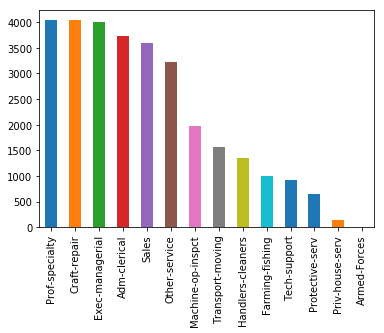

In [29]:
train['occupation'].value_counts().plot.bar()

**5. Relationship**

In [30]:
train['relationship'].value_counts(normalize=True)

Husband           0.413202
Not-in-family     0.256150
Own-child         0.148067
Unmarried         0.106492
Wife              0.046615
Other-relative    0.029474
Name: relationship, dtype: float64

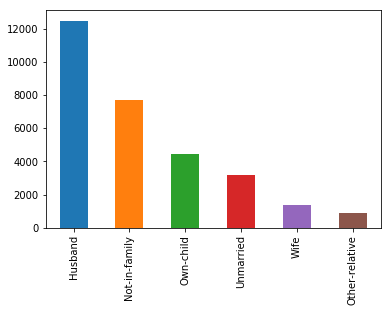

In [31]:
train['relationship'].value_counts().plot.bar()

**6. Race**

In [32]:
train['race'].value_counts(normalize=True)

White                 0.859790
Black                 0.093396
Asian-Pac-Islander    0.029673
Amer-Indian-Eskimo    0.009482
Other                 0.007659
Name: race, dtype: float64

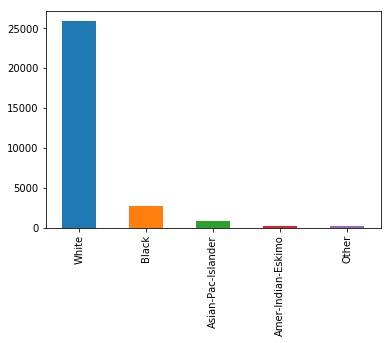

In [33]:
train['race'].value_counts().plot.bar()

~85% of 'race' consists one category 'White' and this is not a good candidate for analysis.  

**7. Sex**

In [34]:
train['sex'].value_counts(normalize=True)

Male      0.675685
Female    0.324315
Name: sex, dtype: float64

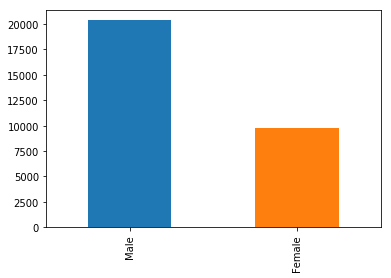

In [35]:
train['sex'].value_counts().plot.bar()

**8. Native-country**

In [36]:
train['native-country'].value_counts(normalize=True)

United-States                 0.911876
Mexico                        0.020224
Philippines                   0.006233
Germany                       0.004244
Puerto-Rico                   0.003614
Canada                        0.003548
El-Salvador                   0.003315
India                         0.003315
Cuba                          0.003050
England                       0.002851
Jamaica                       0.002652
South                         0.002354
China                         0.002254
Italy                         0.002254
Dominican-Republic            0.002221
Vietnam                       0.002122
Guatemala                     0.002089
Japan                         0.001956
Poland                        0.001857
Columbia                      0.001857
Haiti                         0.001392
Taiwan                        0.001392
Iran                          0.001392
Portugal                      0.001127
Nicaragua                     0.001094
Peru                     

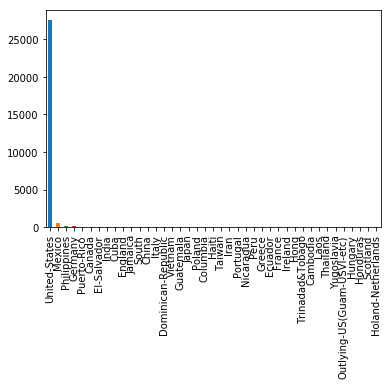

In [37]:
train['native-country'].value_counts().plot.bar()

'Native-country' doesn't seem to be a good candidate as ~90% values are just 1 value. 

**Final categorical variables to be considered**

In [38]:
categorical_cols = ['education-new','marital-status-new','occupation','relationship','sex', 'income']

#### 4.1.2 Continuous variables
1. Age
2. Final-wt
3. Education-num
4. Capital-gain
5. Capital-loss
6. Hrs-per-week

**1. Age**

C:\Users\Peeush Agarwal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


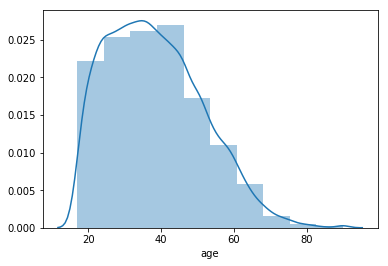

In [39]:
sns.distplot(train['age'], kde=True, bins=10)

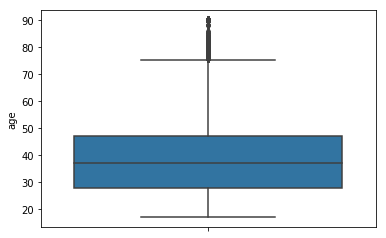

In [40]:
sns.boxplot(y='age', data=train)

From above plots, we can see 'age' is left-skewed distribution. It has outliers for age >= 75

**2. Final-wt**

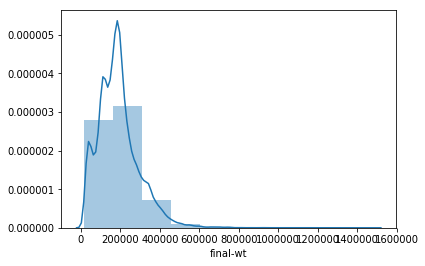

In [41]:
sns.distplot(train['final-wt'], kde=True, bins=10)

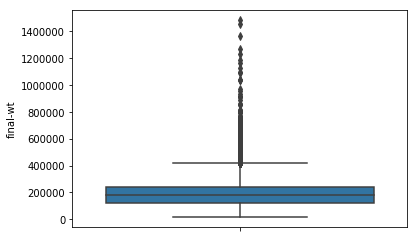

In [42]:
sns.boxplot(y='final-wt', data=train)

From above plots, 'final-wt' has mean of just ~200k and 3rd quartile is approx 400k and above that are outliers mostly. 

**3. Education-num**

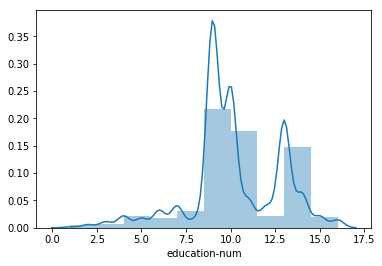

In [43]:
sns.distplot(train['education-num'], kde=True, bins=10)

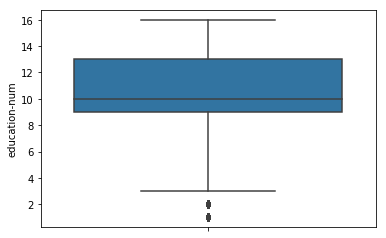

In [44]:
sns.boxplot(y='education-num', data=train)

'education-num' seems to be noisy and has outliers on min side. 

**4. Capital-gain**

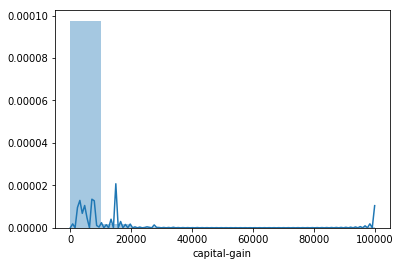

In [45]:
sns.distplot(train['capital-gain'], kde=True, bins=10)

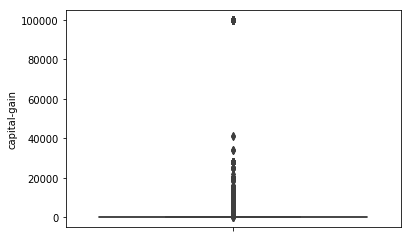

In [46]:
sns.boxplot(y='capital-gain', data=train)

'capital-gain' seems to be irrelevant data as its mean is almost zero. 

**5. Capital-loss**

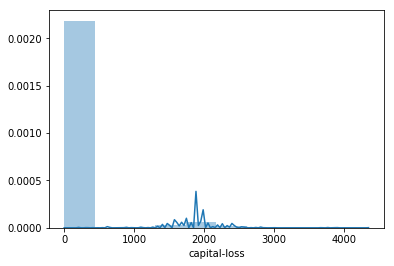

In [47]:
sns.distplot(train['capital-loss'], kde=True, bins=10)

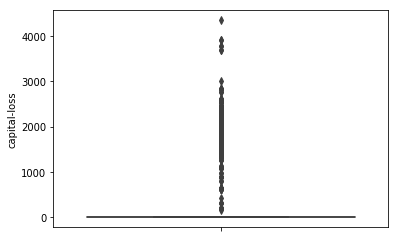

In [48]:
sns.boxplot(y='capital-loss',data=train)

'capital-loss' also seems to be irrelevant as it has mean to be almost 0. 

**6. Hrs-per-week**

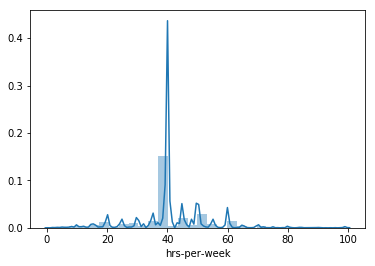

In [49]:
sns.distplot(train['hrs-per-week'], kde=True, bins=30)

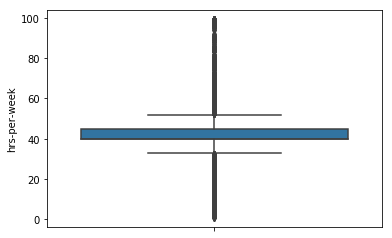

In [50]:
sns.boxplot(y='hrs-per-week', data=train)

'hrs-per-week' col seems to be irrelevant as it has also outliers on min and max sides. 

**Final continuous variables**

In [51]:
continuous_cols = ['age', 'final-wt', 'education-num']

### 4.2 Multivariate analysis
Now we would view relation between target variable and independent variables.

#### 4.2.1 Categorical vs target

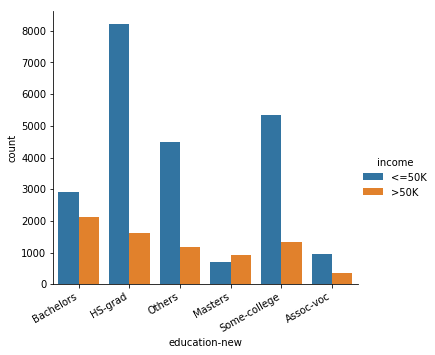

In [52]:
# Education-new vs income

ax = sns.catplot(x='education-new', hue='income', kind='count', data=train, orient="h")
ax.fig.autofmt_xdate()

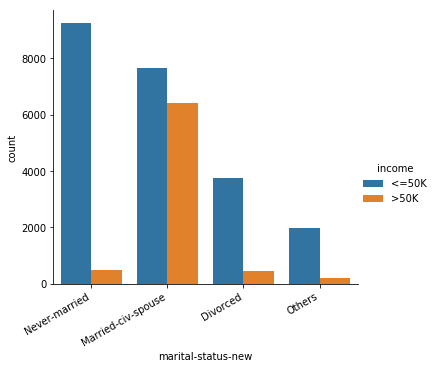

In [53]:
# marital-status-new vs income

ax = sns.catplot(x='marital-status-new', hue='income', kind='count', data=train, orient="h")
ax.fig.autofmt_xdate()

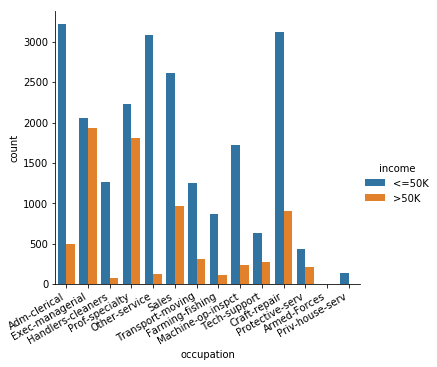

In [54]:
# occupation vs income

ax = sns.catplot(x='occupation', hue='income', kind='count', data=train)
ax.fig.autofmt_xdate()

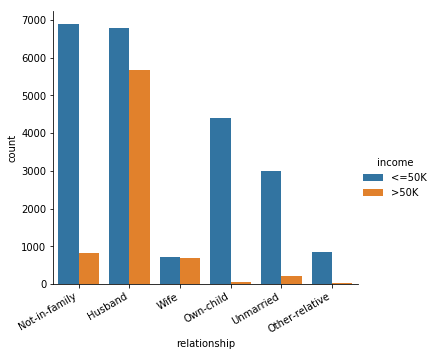

In [55]:
# relationship vs income

ax = sns.catplot(x='relationship', hue='income', kind='count', data=train)
ax.fig.autofmt_xdate()

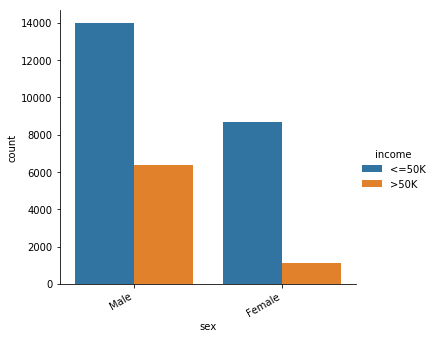

In [56]:
# sex vs income

ax = sns.catplot(x='sex', hue='income', kind='count', data=train)
ax.fig.autofmt_xdate()

#### 4.2.2 Continuous vs target

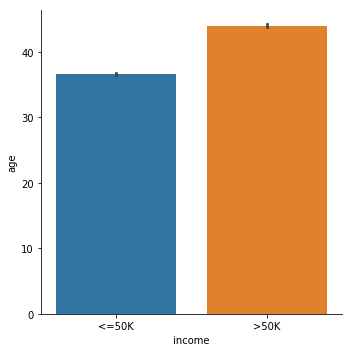

In [57]:
# age vs income

sns.catplot(y='age', x='income', kind='bar', data=train)

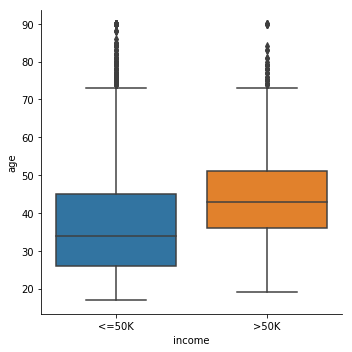

In [58]:
sns.catplot(x='income', y='age', kind='box', data=train)

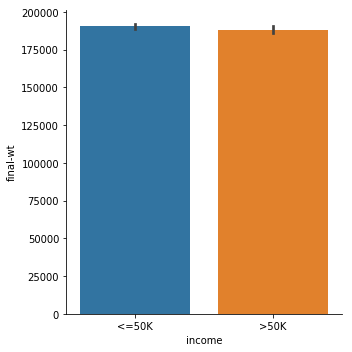

In [59]:
# final-wt vs income

sns.catplot(x='income', y='final-wt', kind='bar', data=train)

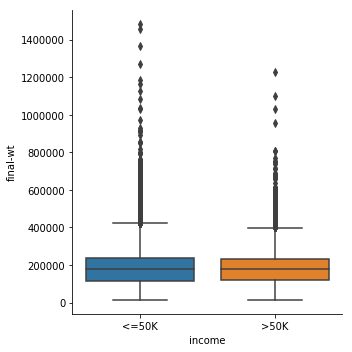

In [60]:
sns.catplot(x='income', y='final-wt', kind='box', data=train)

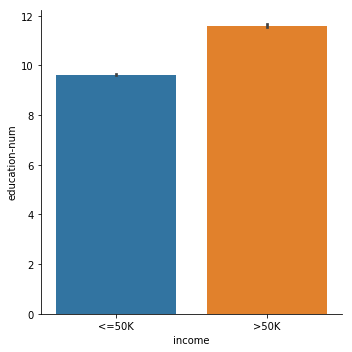

In [61]:
# education-num vs income

sns.catplot(x='income', y='education-num', kind='bar', data=train)

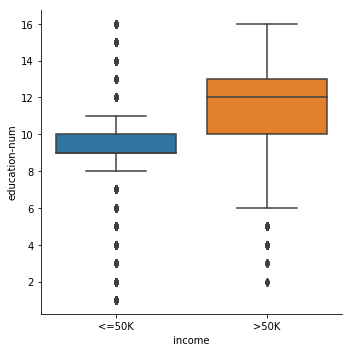

In [62]:
sns.catplot(x='income', y='education-num', kind='box', data=train)

#### 4.2.3 Continuous vs continuous

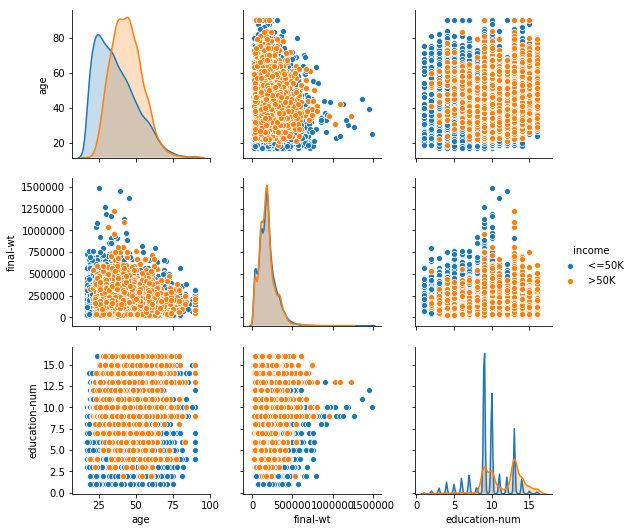

In [63]:
# Pair plot

sns.pairplot(data=train, vars=['age','final-wt','education-num'], hue='income')

In [64]:
train['log-edu-num'] = np.log10(train['education-num'])
train['log-final-wt'] = np.log10(train['final-wt'])

test['log-edu-num'] = np.log10(test['education-num'])
test['log-final-wt'] = np.log10(test['final-wt'])

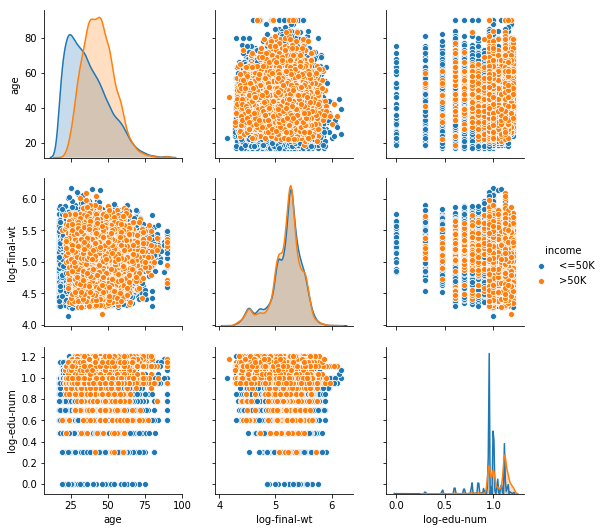

In [65]:
sns.pairplot(train, vars=['age','log-final-wt','log-edu-num'], hue='income')

### 4.3 Final columns to be considered for analysis

1. Categorical Columns
  1. education-new
  2. marital-status-new
  3. occupation
  4. relationship
  5. sex
2. Continuous Columns  
  1. age
  2. final-wt
  3. education-num

In [66]:
# categorical_cols = ['education-new','marital-status-new','occupation','relationship','sex', 'income']
# continuous_cols = ['age', 'final-wt', 'education-num']

print('Categorical columns: {0}'.format(categorical_cols))
print('Continuous columns: {0}'.format(continuous_cols))
final_cols = categorical_cols + continuous_cols
print('Final columns: {0}'.format(final_cols))

Categorical columns: ['education-new', 'marital-status-new', 'occupation', 'relationship', 'sex', 'income']
Continuous columns: ['age', 'final-wt', 'education-num']
Final columns: ['education-new', 'marital-status-new', 'occupation', 'relationship', 'sex', 'income', 'age', 'final-wt', 'education-num']


In [67]:
for col in train.columns:
    # print(col)
    if col not in final_cols:
        train.drop([col], axis=1, inplace=True)
        test.drop([col], axis=1, inplace=True)

In [68]:
# Transform categorical features into numerical features

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for col in categorical_cols:
    train[col] = LE.fit_transform(train[col])
    test[col] = LE.fit_transform(test[col])

In [69]:
train.head()

,age,final-wt,education-num,occupation,relationship,sex,income,education-new,marital-status-new
0,39,77516,13,0,1,1,0,1,2
1,50,83311,13,3,0,1,0,1,1
2,38,215646,9,5,1,1,0,2,0
3,53,234721,7,5,0,1,0,4,1
4,28,338409,13,9,5,0,0,1,1


In [70]:
test.head()

,age,final-wt,education-num,occupation,relationship,sex,income,education-new,marital-status-new
0,25,226802,7,6,3,1,0,4,2
1,38,89814,9,4,0,1,0,2,1
2,28,336951,12,10,0,1,1,4,1
3,44,160323,10,6,0,1,1,5,1
5,34,198693,6,7,1,1,0,4,2


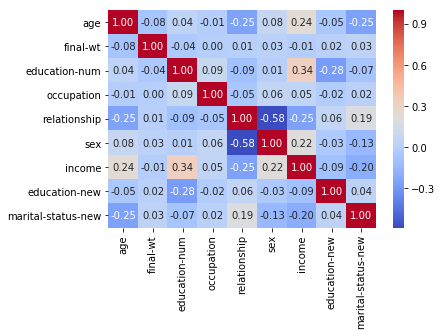

In [71]:
corr = train.corr()

sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## 5. Evaluate algorithms

### 5.1 Split into train and validation data

In [73]:
trainset, valset = model_selection.train_test_split(train, test_size=0.3, random_state=0)
trainlabels = trainset.pop('income')
val_labels = valset.pop('income')

print(trainset.shape)
print(valset.shape)

(21113, 8)
(9049, 8)


### 5.2 Add algorithms to be considered

In [81]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

### 5.3 Run algorithms

In [82]:
results = dict()
for name, model in models:
    model.fit(trainset, trainlabels)
    prediction = model.predict(valset)
    accur_score = accuracy_score(val_labels, prediction)
    results[name] = accur_score
    display('The accuracy score of {0} is {1}'.format(name, accur_score))
    display(confusion_matrix(val_labels, prediction))
    

C:\Users\Peeush Agarwal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'The accuracy score of LR is 0.7474859100453088'

array([[6764,    0],
       [2285,    0]], dtype=int64)

'The accuracy score of LDA is 0.7901425571886397'

array([[6279,  485],
       [1414,  871]], dtype=int64)

'The accuracy score of CART is 0.7598629682837883'

array([[5664, 1100],
       [1073, 1212]], dtype=int64)

'The accuracy score of KNN is 0.7086970936015029'

array([[5993,  771],
       [1865,  420]], dtype=int64)

'The accuracy score of NB is 0.7587578737982097'

array([[6703,   61],
       [2122,  163]], dtype=int64)

'The accuracy score of SVM is 0.7492540612222345'

array([[6732,   32],
       [2237,   48]], dtype=int64)

### 5.4 Final analysis

,Algorithms,Percent
0,LR,0.747486
1,LDA,0.790143
2,CART,0.759863
3,KNN,0.708697
4,NB,0.758758
5,SVM,0.749254


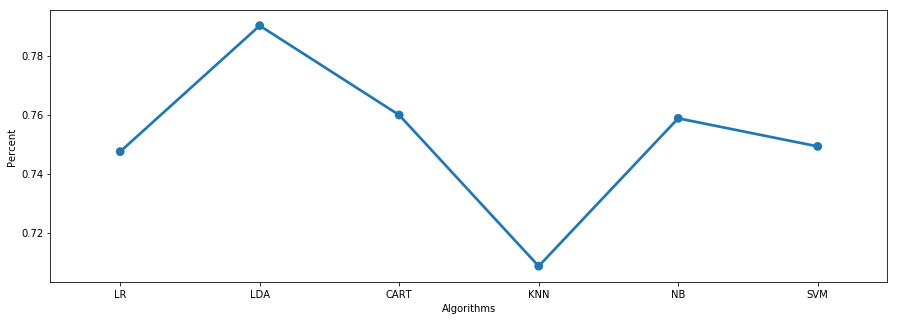

In [85]:
df = pd.DataFrame(list(results.items()), columns=['Algorithms', 'Percent'])
display(df)
fig, (ax1) = plt.subplots(ncols=1,sharey=True, figsize=(15,5))
sns.pointplot(x='Algorithms', y='Percent', data=df, ax=ax1)
plt.show()

It looks like LDA (Linear Discriminant Analysis) is better candidate amongst algorithms. 